In [54]:
%matplotlib inline
import statistics as st
import math
import numpy as np
import pandas as pd
import seaborn as sns
from scipy.stats import variation
import matplotlib.pylab as plt
import random
sns.set()
from sklearn import preprocessing
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn import metrics
from sklearn.metrics import roc_curve, accuracy_score, roc_auc_score
from sklearn.metrics import confusion_matrix, precision_recall_fscore_support
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [2]:
df_original = pd.read_csv('Placement_Data_Full_Class.csv', sep=",")
df_original.head()


,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
3,4,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,NaN
4,5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0


In [3]:
df_original.columns

Index(['sl_no', 'gender', 'ssc_p', 'ssc_b', 'hsc_p', 'hsc_b', 'hsc_s',
       'degree_p', 'degree_t', 'workex', 'etest_p', 'specialisation', 'mba_p',
       'status', 'salary'],
      dtype='object')

In [4]:
df_no_salary = df_original.copy(deep = True)

In [5]:
df_no_salary

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
3,4,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,NaN
4,5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
210,211,M,80.60,Others,82.00,Others,Commerce,77.60,Comm&Mgmt,No,91.0,Mkt&Fin,74.49,Placed,400000.0
211,212,M,58.00,Others,60.00,Others,Science,72.00,Sci&Tech,No,74.0,Mkt&Fin,53.62,Placed,275000.0
212,213,M,67.00,Others,67.00,Others,Commerce,73.00,Comm&Mgmt,Yes,59.0,Mkt&Fin,69.72,Placed,295000.0
213,214,F,74.00,Others,66.00,Others,Commerce,58.00,Comm&Mgmt,No,70.0,Mkt&HR,60.23,Placed,204000.0


In [6]:
df_no_salary.columns

Index(['sl_no', 'gender', 'ssc_p', 'ssc_b', 'hsc_p', 'hsc_b', 'hsc_s',
       'degree_p', 'degree_t', 'workex', 'etest_p', 'specialisation', 'mba_p',
       'status', 'salary'],
      dtype='object')

In [7]:
df_no_salary = df_no_salary.drop(columns=['salary'])

In [8]:
df_no_salary

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status
0,1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed
1,2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed
2,3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed
3,4,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed
4,5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
210,211,M,80.60,Others,82.00,Others,Commerce,77.60,Comm&Mgmt,No,91.0,Mkt&Fin,74.49,Placed
211,212,M,58.00,Others,60.00,Others,Science,72.00,Sci&Tech,No,74.0,Mkt&Fin,53.62,Placed
212,213,M,67.00,Others,67.00,Others,Commerce,73.00,Comm&Mgmt,Yes,59.0,Mkt&Fin,69.72,Placed
213,214,F,74.00,Others,66.00,Others,Commerce,58.00,Comm&Mgmt,No,70.0,Mkt&HR,60.23,Placed


In [9]:
#6 - Faça uma análise exploratória do conjunto de dados df_original (EDA - Exploratory Data Analysis)

In [10]:
df_original.groupby(by=['gender']).agg({"sl_no":[np.mean,np.median, np.std, variation]})
#descobrindo quantos participantes tem na tabela 

C:\Users\andre\anaconda3\lib\site-packages\numpy\core\_methods.py:217: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
C:\Users\andre\anaconda3\lib\site-packages\numpy\core\_methods.py:186: RuntimeWarning: invalid value encountered in true_divide
  arrmean, rcount, out=arrmean, casting='unsafe', subok=False)
C:\Users\andre\anaconda3\lib\site-packages\numpy\core\_methods.py:209: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
C:\Users\andre\anaconda3\lib\site-packages\scipy\stats\stats.py:1072: RuntimeWarning: Mean of empty slice.
  return a.std(axis) / a.mean(axis)
C:\Users\andre\anaconda3\lib\site-packages\numpy\core\_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


sl_no                            
              mean median        std variation
gender                                        
F       101.763158   97.5  61.836099  0.603636
M       111.410072  113.0  62.370424  0.557810

In [11]:
df_original.groupby(by=['hsc_s']).agg({"sl_no":[np.mean,np.median, np.std, variation]})

C:\Users\andre\anaconda3\lib\site-packages\numpy\core\_methods.py:217: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
C:\Users\andre\anaconda3\lib\site-packages\numpy\core\_methods.py:186: RuntimeWarning: invalid value encountered in true_divide
  arrmean, rcount, out=arrmean, casting='unsafe', subok=False)
C:\Users\andre\anaconda3\lib\site-packages\numpy\core\_methods.py:209: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
C:\Users\andre\anaconda3\lib\site-packages\scipy\stats\stats.py:1072: RuntimeWarning: Mean of empty slice.
  return a.std(axis) / a.mean(axis)
C:\Users\andre\anaconda3\lib\site-packages\numpy\core\_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


sl_no                            
                mean median        std variation
hsc_s                                           
Arts      111.909091    137  64.673727  0.551018
Commerce  106.557522    101  65.178455  0.608961
Science   109.318681    111  58.688420  0.533898

In [12]:
df_original.describe().T

,count,mean,std,min,25%,50%,75%,max
sl_no,215.0,108.000000,62.209324,1.00,54.500,108.0,161.500,215.00
ssc_p,215.0,67.303395,10.827205,40.89,60.600,67.0,75.700,89.40
hsc_p,215.0,66.333163,10.897509,37.00,60.900,65.0,73.000,97.70
degree_p,215.0,66.370186,7.358743,50.00,61.000,66.0,72.000,91.00
etest_p,215.0,72.100558,13.275956,50.00,60.000,71.0,83.500,98.00
mba_p,215.0,62.278186,5.833385,51.21,57.945,62.0,66.255,77.89
salary,148.0,288655.405405,93457.452420,200000.00,240000.000,265000.0,300000.000,940000.00


In [13]:
df_original.var()

sl_no       3.870000e+03
ssc_p       1.172284e+02
hsc_p       1.187557e+02
degree_p    5.415110e+01
etest_p     1.762510e+02
mba_p       3.402838e+01
salary      8.734295e+09
dtype: float64

In [14]:
df_original.corr()

,sl_no,ssc_p,hsc_p,degree_p,etest_p,mba_p,salary
sl_no,1.000000,-0.078155,-0.085711,-0.088281,0.063636,0.022327,0.063764
ssc_p,-0.078155,1.000000,0.511472,0.538404,0.261993,0.388478,0.035330
hsc_p,-0.085711,0.511472,1.000000,0.434206,0.245113,0.354823,0.076819
degree_p,-0.088281,0.538404,0.434206,1.000000,0.224470,0.402364,-0.019272
etest_p,0.063636,0.261993,0.245113,0.224470,1.000000,0.218055,0.178307
mba_p,0.022327,0.388478,0.354823,0.402364,0.218055,1.000000,0.175013
salary,0.063764,0.035330,0.076819,-0.019272,0.178307,0.175013,1.000000


In [15]:
#7 - Aplique o LabelEncoder nos atributos categóricos 
#(gender, ssc_b, hsc_b, hsc_s, degree_t, workex, specialisation, status) de df_no_salary
le = preprocessing.LabelEncoder()
le.fit(df_no_salary['gender'])
gender = le.transform(df_no_salary['gender'])
df_no_salary['gender'] = gender

le.fit(df_no_salary['ssc_b'])
ssc_b = le.transform(df_no_salary['ssc_b'])
df_no_salary['ssc_b'] = ssc_b

le.fit(df_no_salary['hsc_b'])
hsc_b = le.transform(df_no_salary['hsc_b'])
df_no_salary['hsc_b'] = hsc_b

le.fit(df_no_salary['hsc_s'])
hsc_s = le.transform(df_no_salary['hsc_s'])
df_no_salary['hsc_s'] = hsc_s

le.fit(df_no_salary['degree_t'])
degree_t = le.transform(df_no_salary['degree_t'])
df_no_salary['degree_t'] = degree_t

le.fit(df_no_salary['workex'])
workex = le.transform(df_no_salary['workex'])
df_no_salary['workex'] = workex

le.fit(df_no_salary['specialisation'])
specialisation = le.transform(df_no_salary['specialisation'])
df_no_salary['specialisation'] = specialisation

le.fit(df_no_salary['status'])
status = le.transform(df_no_salary['status'])
df_no_salary['status'] = status

In [16]:
df_no_salary

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status
0,1,1,67.00,1,91.00,1,1,58.00,2,0,55.0,1,58.80,1
1,2,1,79.33,0,78.33,1,2,77.48,2,1,86.5,0,66.28,1
2,3,1,65.00,0,68.00,0,0,64.00,0,0,75.0,0,57.80,1
3,4,1,56.00,0,52.00,0,2,52.00,2,0,66.0,1,59.43,0
4,5,1,85.80,0,73.60,0,1,73.30,0,0,96.8,0,55.50,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
210,211,1,80.60,1,82.00,1,1,77.60,0,0,91.0,0,74.49,1
211,212,1,58.00,1,60.00,1,2,72.00,2,0,74.0,0,53.62,1
212,213,1,67.00,1,67.00,1,1,73.00,0,1,59.0,0,69.72,1
213,214,0,74.00,1,66.00,1,1,58.00,0,0,70.0,1,60.23,1


In [17]:
#8 - Selecione um dos modelos de classificação aprendidos até agora na disciplina (Naive Bayes ou Regressão Logística) e
#treine-o com df_no_salary. Seu objetivo é prever a recolocação (status = [Placed/Recolocado, Not Placed/Não Recolocado])
#de cada indivíduo.

predictors = ['gender', 'ssc_p','ssc_b','hsc_p','hsc_b','hsc_s', 'degree_p', 'degree_t','workex','etest_p','specialisation','mba_p']
outcome = 'status'


#X = pd.get_dummies(df_no_salary[predictors], prefix='', prefix_sep='', drop_first=True)
#y = df_no_salary[outcome]

#X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=0)

#logistic_regression= LogisticRegression()
#logistic_regression.fit(X_train,y_train)
#y_pred=logistic_regression.predict(X_test)

clf = MultinomialNB()
clf.fit(df_no_salary[predictors], df_no_salary[outcome])

MultinomialNB()

df_no_salary = X.loc[146:146, :]
print('predicted class: ', logit_reg.predict(df_no_salary)[0])
probabilities = pd.DataFrame(logit_reg.predict_proba(df_no_salary),
 columns=logit_reg.classes_)
print()
print('predicted probabilities: ')
probabilities

# Confusion matrix
pred = logit_reg.predict(X)
pred_y = logit_reg.predict(X) == 'default'
true_y = y == 'default'
true_pos = true_y & pred_y
true_neg = ~true_y & ~pred_y
false_pos = ~true_y & pred_y
false_neg = true_y & ~pred_y
conf_mat = pd.DataFrame([[np.sum(true_pos), np.sum(false_neg)], [np.sum(false_pos), np.sum(true_neg)]])
display(conf_mat)

Recall =  0.7633118192819686
Precision =  0.8470228601807549
AUC =  0.904699475594998


C:\Users\andre\anaconda3\lib\site-packages\sklearn\metrics\_ranking.py:813: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  UndefinedMetricWarning)


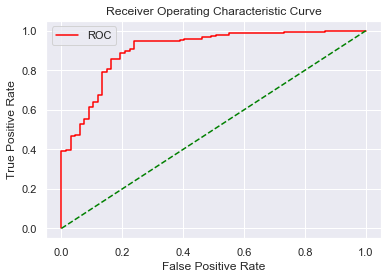

In [25]:
#9 - Comente as avaliações (Recall, Precision, ROC e AUC) obtidas pelo modelo de 
#classificação utilizado. Informe se os resultados são bons ou ruins de acordo com as métricas.


fitted = clf.predict(df_no_salary[predictors])
prob = clf.predict_proba(df_no_salary[predictors])
prob = prob[:, 1]
print('Recall = ', recall_score(df_no_salary[outcome], fitted, average='macro'))

print('Precision = ' ,precision_score(df_no_salary[outcome], fitted, average='macro'))

fpr, tpr, thresholds = metrics.roc_curve(df_no_salary[outcome], fitted, pos_label=2)
print('AUC = ', metrics.roc_auc_score(df_no_salary[outcome], prob))



def plot_roc_curve(fper, tper):
    plt.plot(fper, tper, color='red', label='ROC')
    plt.plot([0, 1], [0, 1], color='green', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic Curve')
    plt.legend()
    plt.show()



fper, tper, thresholds = roc_curve(df_no_salary[outcome], prob)
plot_roc_curve(fper, tper)


#Como a previsão foi feita em cima dos mesmos dados que foram utilizados para criar o modelo, logo, a previsão teve uma assertidade muito alta.
# Apresentando um recall, precision, AUC e curva roc bastante elevado.

In [53]:
#10 - A partir de df_original, crie o Data Frame df_no_status agora removendo a coluna status,
#aplicando o LabelEncoder, separe as amostras que não possuem o atributo salary (dados ausentes)

df_no_status = df_original.drop(columns=['status'])
df_no_status

le = preprocessing.LabelEncoder()
le.fit(df_no_status['gender'])
gender = le.transform(df_no_status['gender'])
df_no_status['gender'] = gender

le.fit(df_no_status['ssc_b'])
ssc_b = le.transform(df_no_status['ssc_b'])
df_no_status['ssc_b'] = ssc_b

le.fit(df_no_status['hsc_b'])
hsc_b = le.transform(df_no_status['hsc_b'])
df_no_status['hsc_b'] = hsc_b

le.fit(df_no_status['hsc_s'])
hsc_s = le.transform(df_no_status['hsc_s'])
df_no_status['hsc_s'] = hsc_s

le.fit(df_no_status['degree_t'])
degree_t = le.transform(df_no_status['degree_t'])
df_no_status['degree_t'] = degree_t

le.fit(df_no_status['workex'])
workex = le.transform(df_no_status['workex'])
df_no_status['workex'] = workex

le.fit(df_no_status['specialisation'])
specialisation = le.transform(df_no_status['specialisation'])
df_no_status['specialisation'] = specialisation



df_no_status_na_salario = df_no_status.loc[df_no_status['salary'].isna(),:]
df_no_status_na_salario

df_no_status_com_salario = df_no_status.loc[df_no_status['salary'] > 0,:]
#df_no_status_com_salario
#df_no_status_na_salario
#df_no_status

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,salary
0,1,1,67.00,1,91.00,1,1,58.00,2,0,55.0,1,58.80,270000.0
1,2,1,79.33,0,78.33,1,2,77.48,2,1,86.5,0,66.28,200000.0
2,3,1,65.00,0,68.00,0,0,64.00,0,0,75.0,0,57.80,250000.0
3,4,1,56.00,0,52.00,0,2,52.00,2,0,66.0,1,59.43,NaN
4,5,1,85.80,0,73.60,0,1,73.30,0,0,96.8,0,55.50,425000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
210,211,1,80.60,1,82.00,1,1,77.60,0,0,91.0,0,74.49,400000.0
211,212,1,58.00,1,60.00,1,2,72.00,2,0,74.0,0,53.62,275000.0
212,213,1,67.00,1,67.00,1,1,73.00,0,1,59.0,0,69.72,295000.0
213,214,0,74.00,1,66.00,1,1,58.00,0,0,70.0,1,60.23,204000.0


In [55]:
#11 - Treine um modelo de regressão linear múltipla e preveja os salários (salary)
#das amostras que não possuem essa informação em df_no_status

predictors = ['gender', 'ssc_p','ssc_b','hsc_p','hsc_b','hsc_s', 'degree_p', 'degree_t','workex','etest_p','specialisation','mba_p']
outcome = 'salary'
model_salary = LinearRegression()
model_salary.fit(df_no_status_com_salario[predictors],df_no_status_com_salario[outcome])


LinearRegression()